### $\color{royalblue}{\text{ Peta vje≈æba iz numeriƒçkih metoda u astronomiji (NMA), datum: 14.11.2024.}} $

### $\color{magenta}{\text{1. NUMERIƒåKO DIFERENCIRANJE.}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp, spline_der, extrema, spline_integrate

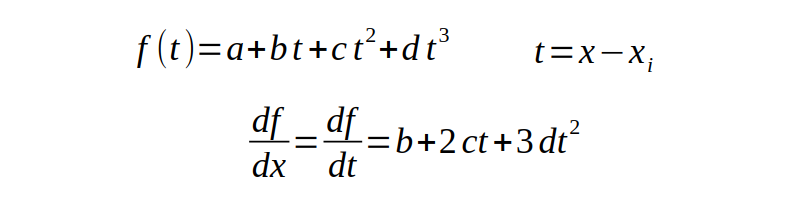

Za uvod, potrebno je odrediti heliocentriƒçnu radijalnu brzinu Saturna u proizvoljnom trenutku kori≈°ƒáenjem linearne interpolacije.

In [19]:
au = 1.495978707e11 # m

t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::10]
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)

t0 = 9156.543 # random vrijeme

### 1.1. Linearna interpolacija.

[    0.   200.   400.   600.   800.  1000.  1200.  1400.  1600.  1800.
  2000.  2200.  2400.  2600.  2800.  3000.  3200.  3400.  3600.  3800.
  4000.  4200.  4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.
  6000.  6200.  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.
  8000.  8200.  8400.  8600.  8800.  9000.  9200.  9400.  9600.  9800.
 10000. 10200. 10400. 10600.]
t<t0 = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False] 
 ---------------------------------------------------
t1 = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 ---------------------------------------------------
t1 = 45
 ----------------

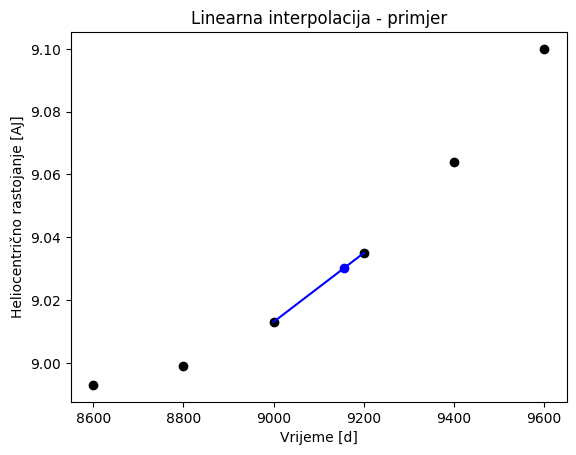

In [21]:
# pronala≈æenje odgovarajuƒáih indeksa pomocu np.flatnonzero
# najveƒái koji je manji od t0 (prvi s lijeve strane)
# pravimo logiƒçki niz

print(t)
print('t<t0 = {} \n ---------------------------------------------------'.format(t<t0))

# tra≈æimo gdje  nisu nule, tj. gdje je True

t1 = np.flatnonzero(t<t0)

# uzimamo samo posljednji

print('t1 = {}\n ---------------------------------------------------'.format(t1))
t1 = t1[-1]

print('t1 = {}\n ---------------------------------------------------'.format(t1))

# najmanji koji je veƒái od t0 (prvi s desne strane)

t2 = np.flatnonzero(t>t0)[0]
print('t2 = {}\n ---------------------------------------------------'.format(t2))

r_lin = r[t1]+(t0-t[t1])*(r[t2]-r[t1])/(t[t2]-t[t1])

vr_lin = (r[t2]-r[t1])/(t[t2]-t[t1])
print('vr_lin= {} au/d\n ---------------------------------------------------'.format(vr_lin))
vr_lin = (r[t2]-r[t1])/(t[t2]-t[t1])
print('vr_lin= {} m/s\n ---------------------------------------------------'.format(np.round(vr_lin*au/86400,2)))

fig, ax = plt.subplots()
plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot(t0,r_lin,'ob')
plt.plot([t[t1],t[t2]],[r[t1],r[t2]], 'b')

# kompletan plot
# plt.plot(t,r, '.')
# plt.plot(t0,r0,'or',markersize=5)

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentriƒçno rastojanje [AJ]')
plt.title('Linearna interpolacija - primjer')
plt.show()

### 1.2. Interpolacija splajnom.

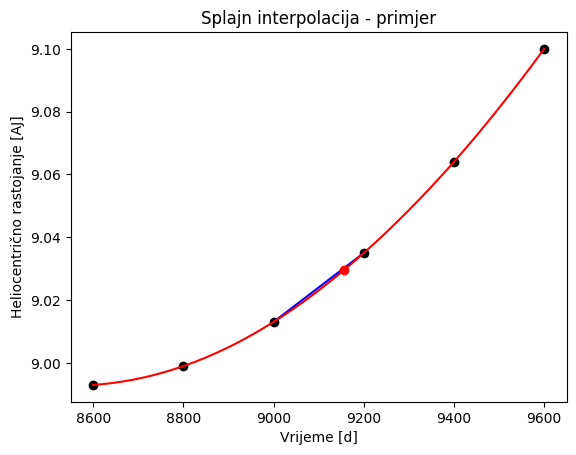

In [24]:
tt = np.linspace(t[t1-2],t[t1+3], 100000)
rr = spline_interp(t, r, tt)

r_splajn = spline_interp(t, r, [t0])

plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot([t[t1],t[t2]],[r[t1], r[t2]], 'b')
plt.plot(t0,r_splajn,'or')
plt.plot(tt,rr,'r')

# plt.xlim(9000, 9200)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentriƒçno rastojanje [AJ]')
plt.title('Splajn interpolacija - primjer')
plt.show()

### 1.3. Izvod funkcije kori≈°ƒáenjem splajn interpolacije.

vr_splajn= [208.23] m/s
 ---------------------------------------


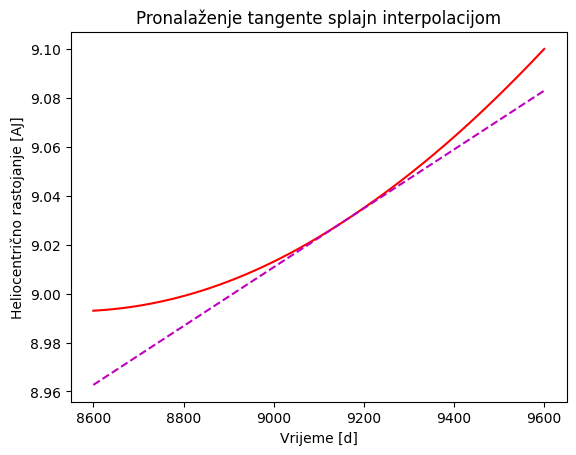

In [23]:
vr_splajn = spline_der(t,r,[t0],1)
print('vr_splajn= {} m/s\n ---------------------------------------'.format(np.round(vr_splajn*au/86400,2)))

# plotovanje tangente

plt.plot(tt,rr,'r')
# plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot([t[t1-2], t[t2+2]],[vr_splajn*(t[t1-2]-t0)+r_splajn, vr_splajn*(t[t2+2]-t0)+r_splajn], '--m')

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentriƒçno rastojanje [AJ]')
plt.title('Pronala≈æenje tangente splajn interpolacijom')
plt.show()

### $\color{magenta}{\text{2. (LOKALNI) EKSTREMUMI I SPLAJN INTERPOLACIJA.}}$
Tra≈æimo ekstreme za funkciju krive sjaja asteroida Ryugy.

In [5]:
t, m = np.loadtxt('Ryugy_light_curve.txt', delimiter=',', unpack=True)

print(len(t),len(m))

57 57


### 2.1. Pronala≈æenje lokalnih ekstrema splajn interpolacijom.

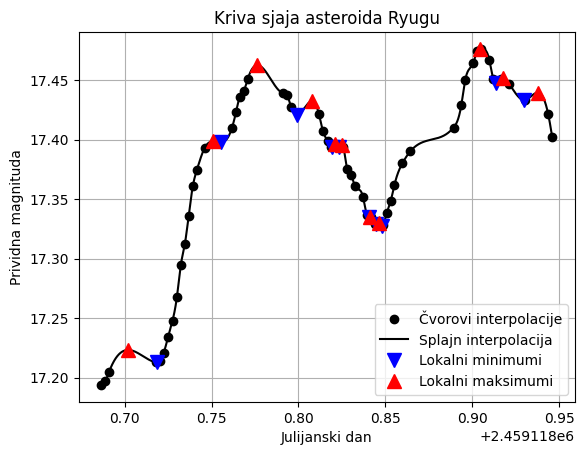

In [6]:
fig, ax = plt.subplots()
ax.plot(t, m,'ok', label ='ƒåvorovi interpolacije')
   
minimumi = extrema(t, m,'min')
maksimumi = extrema(t, m,'max')

tt = np.linspace(t[0], t[-1], 10000)
mm = spline_interp(t, m, tt)
ax.plot(tt, mm,'k',label ='Splajn interpolacija')

ax.plot(minimumi[0], minimumi[1], 'vb', markersize=10, label ='Lokalni minimumi')
ax.plot(maksimumi[0], maksimumi[1], '^r', markersize=10,label ='Lokalni maksimumi')

plt.xlabel('Julijanski dan')
plt.ylabel('Prividna magnituda')
plt.title('Kriva sjaja asteroida Ryugu')
ax.legend()
plt.grid()
plt.show()

### 2.2. Primjer: odrediti maksimalni i minimalni sjaj asteroida Ryugu, kao i trenutke
### u kojima do njih dolazi. Plotovati ih na grafiku krive sjaja ovog asteroida.

Maksimalni sjaj (minimalna magnituda): 17.194 u trenutku: 2459118.686655
Minimalni sjaj (maksimalna magnituda): 17.476 u trenutku: 2459118.905029


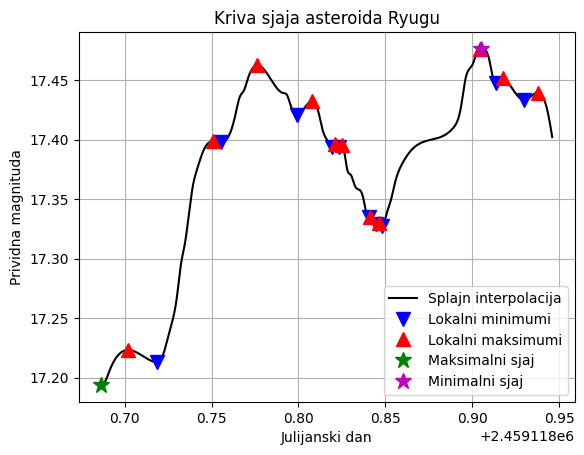

In [29]:
global_min_idx = np.argmin(m)  # indeks globalnog minimuma
global_max_idx = np.argmax(m)  # indeks globalnog maksimuma

global_min_t = t[global_min_idx] 
global_max_t = t[global_max_idx]
global_min_m = m[global_min_idx]
global_max_m = m[global_max_idx]

print(f'Maksimalni sjaj (minimalna magnituda): {global_min_m} u trenutku: {global_min_t}')
print(f'Minimalni sjaj (maksimalna magnituda): {global_max_m} u trenutku: {global_max_t}')

# plt.plot(t, m,'ok', label ='ƒåvorovi interpolacije')
plt.plot(tt, mm,'k',label ='Splajn interpolacija')
plt.plot(minimumi[0], minimumi[1], 'vb', markersize=10, label ='Lokalni minimumi')
plt.plot(maksimumi[0], maksimumi[1], '^r', markersize=10,label ='Lokalni maksimumi')
plt.plot(global_min_t, global_min_m, '*g', markersize=12, label='Maksimalni sjaj')
plt.plot(global_max_t, global_max_m, '*m', markersize=12, label='Minimalni sjaj')

plt.xlabel('Julijanski dan')
plt.ylabel('Prividna magnituda')
plt.title('Kriva sjaja asteroida Ryugu')
plt.legend()
plt.grid()
plt.show()

### $\color{magenta}{\text{3. NUMERIƒåKA INTEGRACIJA.}}$

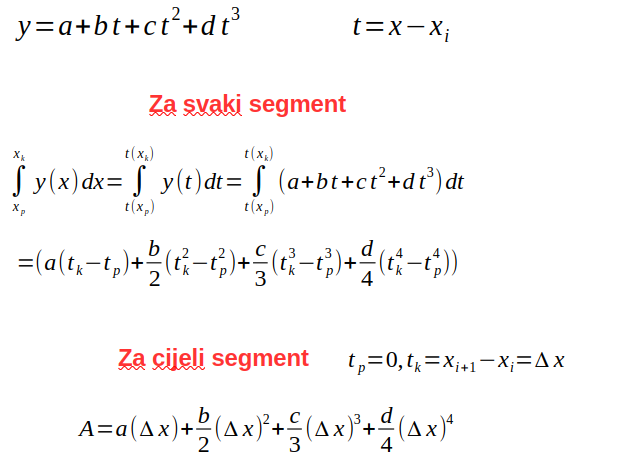

Hoƒáemo da odredimo ukupnu koliƒçinu zraƒçenja koju Sunce izraƒçi na cijelom opsjegu talasnih du≈æina koje su date u podacima. Dalje, treba odrediti vrijednost kori≈°ƒáenjem trapezne formule i pomoƒáu interpolacije splajnom, te odrediti apsolutnu i relativnu gre≈°ku. Hoƒáemo da odgovorimo na pitanje koliki dio ukupnog zraƒçenja Sunce izraƒçi
u optiƒçkom dijelu spektra?

2001
2001


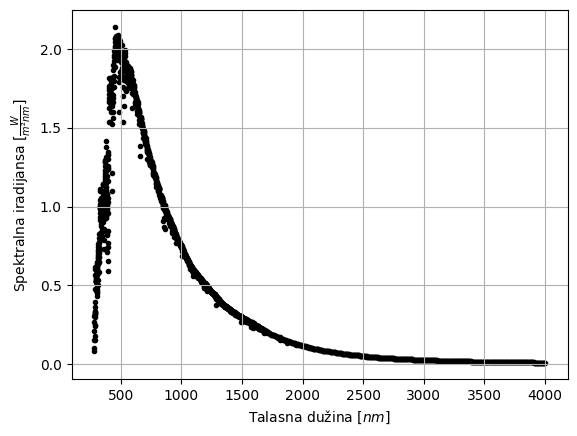

In [16]:
l, si = np.loadtxt('Spektar Sunca.txt', skiprows=2, delimiter=',', unpack=True)
print(len(l))
print(len(si))

plt.scatter(l, si, marker='.', color='black')
plt.xlabel(r'Talasna du≈æina $[nm]$')
plt.ylabel(r'Spektralna iradijansa $[\frac{W}{m¬≤nm}]$')
plt.grid()
plt.show()

### 3.1. Integracija trapeznim pravilom.

In [15]:
integral_trapez=0
for i in range (len(l)-1):
    integral_trapez+=(si[i+1]+si[i])*(l[i+1]-l[i])/2

print('Ukupna iradijansa na intervalu talasnih du≈æina od \
{} do {} je {} W/m^2'.format(l[0],l[-1],np.round(integral_trapez,10)))

1295.1408
Ukupna iradijansa na intervalu talasnih du≈æina od 280.0 do 4000.0 je 1295.1408 W/m^2


### 3.2. Integracija splajnom.

In [16]:
integral_splajn = spline_integrate(l,si,l[0],l[-1])
print('Ukupna iradijansa na intervalu talasnih du≈æina od \
{} do {} je {} W/m^2'.format(l[0],l[-1],np.round(integral_splajn,10)))

Ukupna iradijansa na intervalu talasnih du≈æina od 280.0 do 4000.0 je 1300.0324901156 W/m^2


### 3.3. Relativna gre≈°ka.

In [5]:
print('Relativna gre≈°ka trapezne metode u odnosu \
na splajn je {} %'.format(np.round((integral_trapez-integral_splajn)/integral_splajn*100,5)))

Relativna gre≈°ka trapezne metode u odnosu na splajn je 0.00021 %


### 3.4.Primjer: naƒái ukupnu koliƒçinu zraƒçenja koju Sunce izraƒçi na opsjegu talasnih du≈æina od $ùúÜ_0$
### do proizvoljne talasne du≈æine $ùúÜ$. Koliki je ukupni fluks Sunƒçevog zraƒçenja na svim talasnim du≈æinama?

2001 2001


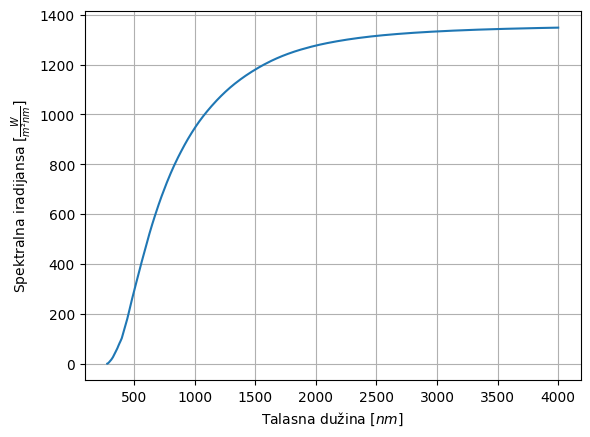

Ukupno zraƒçenje na svim talasnim du≈æinama je 1347.93 W/m^2


In [16]:
plt.figure()

si_ukupno = np.zeros_like(l)

for i in range(len(l)):
    si_ukupno[i] = spline_integrate(l, si, l[0], l[i])

print(len(l), len(si_ukupno))
plt.plot(l,si_ukupno)
plt.xlabel(r'Talasna du≈æina $[nm]$')
plt.ylabel(r'Spektralna iradijansa $[\frac{W}{m¬≤nm}]$')
plt.grid()
plt.show()

print('Ukupno zraƒçenje na svim talasnim du≈æinama je {} W/m^2'.format(np.round(si_ukupno[-1],2)))

### $\color{red}{\text{Razmisliti o razlikama izmeƒëu 3.2 i 3.4. Da li spektralna iradijansa i kumulativna}}$
### $\color{red}{\text{iradijansa imaju neku primjenu? Koje su razlike? Da li primjeri i sami}}$
### $\color{red}{\text{nazivi imaju smisla?}}$

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 1. Odrediti trenutke kada se Saturn nalazi u perihelu i afelu putanje. Koristiti metodu numeriƒçkog diferenciranja.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 2. Da li postoje neke razlike, u prethodnom zadatku, kad koristimo numeriƒçko diferenciranje u odnosu na to 

#### da samo naƒëemo ekstreme na drugi naƒçin? Objasniti.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

### $\color{green}{\text{RJE≈†ENJA:}} $